# Линейная регрессия: аналитическое решение, классический и стохастический градиентный спуск

## Теоретическая часть

Введем некоторые обозначения, необходимые для некоторой модели:
 - $x = (x^{1}, \ldots, x^{d})$ - признаковое описание объекта
 - $X = (x_{i}, y_{i})_{i = 1}^{l}$ - обучающая выборка
 - $a(x)$ - алгоритм, модель
 - $Q(a, X)$ - функционал ошибки алгоритма $a$ на выборке $X$ 
 
Оптимизационная задача обучения модели: $a(x) = arg\min_\limits{a \in A}{Q(a, X)}$. 

Рассмотрим подробно модель линейной регрессии. Линейный алгоритм в задачах регрессии выглядит следующим образом:
$$ a(x) = w_{0} + \sum\limits_{j = 1}^{d}{w_{j}x^{j}}, $$
где $w_{0}$ - свободный коэффициент, $x^{j}$ - признаки, а $w_{j}$ - их веса. 

Если добавить $(d + 1)$-ый признак, который на каждом объекте принимает значение $1$, линейный алгоритм можно будет записать в более компактной форме
$$ a(x) = \sum\limits_{j = 1}^{d + 1}{w_{j}x^{j}} = \langle w, x \rangle. $$ 

Линейная регрессия использует функционал ошибки, именуемый среднеквадратичной ошибкой алгоритма, который задается следующим образом:
$$ Q(a, x) = \frac{1}{l} \sum\limits_{i = 1}^{l}{(a(x_{i}) - y_{i})^{2}}. $$ 

В случае линейной модели получаем следующую запись функционала ошибки:
$$ Q(w, x) = \frac{1}{l} \sum\limits_{i = 1}^{l}{(\langle w, x_{i} \rangle - y_{i})^{2}}. $$ 

Можно перейти к матричной форме записи среднеквадратичной ошибки. В этом случае матрица "объекты-признаки" $X$ составлена из признаковых описаний объектов из обучающей выборки. В $ij$-ом элементе матрицы $X$ записано значение $j$-го признака на $i$-ом объекте обучающей выборки. Вектор ответов $y$ составлен из истинных ответов для всех объектов. В этом случае среднеквадратичная ошибка может быть записана в матричной виде:
$$ Q(w, X) = \frac{1}{l}\| Xw - y \|^{2} \rightarrow \min_{w}. $$

### Аналитическое решение

Из курса математической статистики нам известно, что оптимальное значение весов может быть получено из формулы
$$ w^{*} = (X^{T}X)^{-1}X^{T}y. $$ 

Матрица $(X^{T}X)^{-1}X^{T}$ называется псевдообратной для матрицы $X$. Ее нахождение в общем случае - операция с большой вычислительной сложностью. Также такой способ нахождения решения не может быть применен, если матрица $X$ плохо обусловлена. Поэтому на практике для нахождения минимума функционала ошибки быстрее работает численный метод оптимизации - градиентный спуск, а также его стохастическая версия.

### Градиентный спуск

При использовании стандратного градиентного спуска алгоритм выглядит следующим образом:
 - Инициализация вектора начальных весов $w^{0}$.
 - На следующих итерациях пересчитывается вектор весов:
 $$ w^{t} = w^{t - 1} - \eta_{t} \nabla{Q(w^{t - 1}, X)}. $$ 
 Градиент функции ошибки в общем случае выглядит таким образом:
 $$ \nabla_{w}{Q(w, X)} = \frac{2}{l}X^{T}(Xw - y). $$
 - При наступлении сходимости прекращаются итерации спуска. Зачастую используется такой критерий останова:
 $$ \|w^{t} - w^{t - 1} \| < \varepsilon. $$

### Стохастический градиентный спуск

В обычном градиентном спуске выражение для $j$-ой компоненты градиента содержит суммирование по всем объектам обучающей выборки:
$$ \frac{\partial{Q}}{\partial{w_{j}}} = \frac{2}{l} \sum\limits_{i = 1}^{l}{x_{i}^{j}(\langle w, x \rangle - y_{i})}. $$ 

В этом и состоит основной недостаток метода градиентного спуска - в случае большой выборки даже одна итерация метода градиентного спуска будет производиться долго. 

Идея стохастического градиентного спуска основана на том, что в сумме в выражении для $j$-ой компоненты градиента $i$-ое слагаемое указывает то, как нужно поменять вес $w_{j}$, чтобы качество увеличилось для $i$-го объекта выборки. Вся сумма при этом задает, как нужно изменить этот вес, чтобы повысить качество для всех объектов выборки. В стохастическом методе градиентного спуска градиент функции качества вычисляется только на одном случайно выбранном объекте обучающей выборки. Это позволяет обойти вышеупомянутый недостаток обычного градиентного спуска. 

Таким образом, алгоритм стохастического градиентного спуска следующий:
 - Инициализация вектора начальных весов $w^{0}$.
 - Далее последовательно вычисляются итерации $w^{t}$: сначала случайным образом выбирается объект $x_{i}$ из обучающей выборки $X$ и вычисляется вектор градиента функции качества на этом объекте, а следующее приближение получается из предыдущего вычитанием умноженного на шаг $\eta_{t}$ полученного вектора:
 $$ w^{t} = w^{t - 1} - \eta_{t} \nabla{Q(w^{t - 1}, \{x_{i}\})}. $$ 
 - При наступлении сходимости прекращаются итерации спуска. Зачастую используется такой критерий останова:
 $$ \|w^{t} - w^{t - 1} \| < \varepsilon. $$

## План решения

В качестве исходных данных будем использовать датасет *advertising.csv*. В нем содержатся данные о затратах на рекламу товара по телевидению, на радио и в газетах, а также соответствующие данные о продажах товара. Задача - построить линейную регрессионную модель по этим данным, с помощью которой можно "предсказывать" продажи, исходя из затрат.

 - Импортируем данные и подготовим их для использования в задаче регрессии
 - Решим задачу аналитически, используя явный вид решения для вектора весов
 - Решим задачу численно, предварительно реализуя обычный градиентный спуск и его стохастическую версию
 - Сравним полученные результаты

## Реализация решения

Загрузим данные из файла *advertising.csv* в объект pandas DataFrame.

In [1]:
#импортирование необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adver_data = pd.read_csv('advertising.csv')

Посмотрим на структуру датасета и на распределение признаков в этом наборе данных.

In [3]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


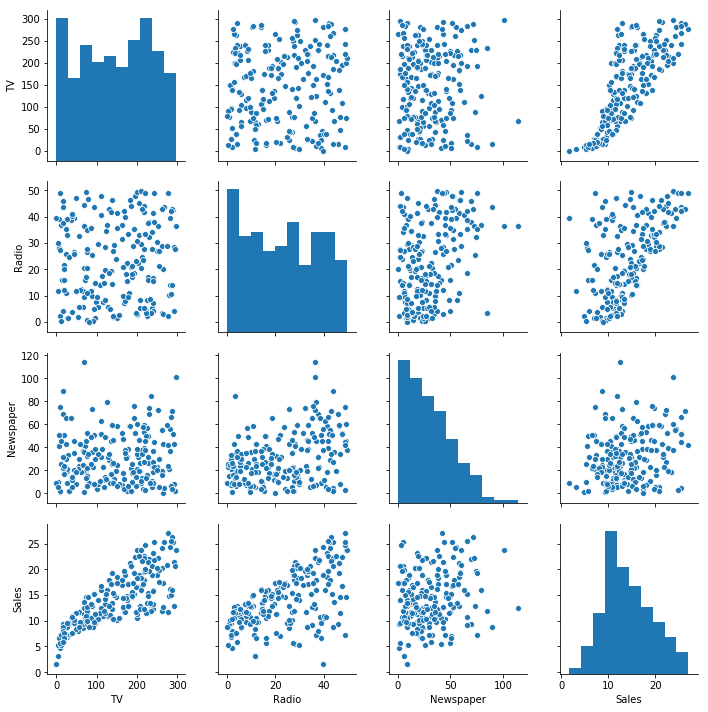

In [4]:
sns.pairplot(adver_data)

Создадим массивы $X$ из столбцов TV, Radio и Newspaper и $y$ - из столбца Sales.

In [5]:
#X - выборка, y - целевой признак
X = np.array(adver_data.values[:, 0:3])
y = np.array(adver_data.values[:, 3])

Отмасштабируем столбцы матрицы $X$, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.

In [6]:
means, stds = np.mean(X, axis = 0), np.std(X, axis = 0)
X = (X - means) / stds

Добавим к матрице $X$ столбец из единиц для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.

In [7]:
size = np.shape(X)[0]
ones = np.reshape(np.ones(size), (size, 1))

X = np.hstack((X, ones))

Реализуем функцию среднеквадратичной ошибки прогноза. Она принимает два аргумента - истинное значение целевого признака и значение целевого признака, предсказанного моделью. 

In [8]:
#y - истинное значение целевого признака, y_pred - значение целевого признака, предсказанного моделью
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

Реализуем функцию для подсчета весов линейной модели согласно аналитическому решению задачи линейной регрессии.

In [9]:
def analytical_solution(X, y):
    return np.linalg.solve(np.dot(X.transpose(), X), np.dot(X.transpose(), y))

Посмотрим на веса линейной модели при использовании аналитического решения.

In [10]:
analytical_weights = analytical_solution(X, y)
print analytical_weights

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


Реализуем функцию, которая принимает на вход матрицу $X$ и вектор весов линейной модели $w$, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы $X$ с весами $w$.

In [11]:
def linear_prediction(X, w):
    return np.dot(X, w)

Посмотрим на среднеквадратичную ошибку прогноза значений Sales в виде линейной модели с весами, найденными с помощью аналитического решения.

In [12]:
linear_predicted = linear_prediction(X, analytical_weights)
print("Mean squared error for linear model with weights from analytical solution: {}".format(mean_squared_error(y, linear_predicted)))

Mean squared error for linear model with weights from analytical solution: 2.78412631451


Напишем функции, реализующую шаг обычного градиентного спуска и стохастического градиентного спуска для линейной регрессии.

In [13]:
'''
X - матрица объекты-признаки,
y - вектор целевых признаков,
w - текущим вектор весов, 
eta - шаг градиентного спуска
'''

def gradient_descent_step(X, y, w, eta = 0.01):
    return w - 2 * eta / X.shape[0] * np.dot(np.transpose(X), np.dot(X, w) - y)

In [14]:
'''
X - матрица объекты-признаки, 
y - вектор целевых признаков,
w - текущим вектор весов, 
train_ind - индекс объекта обучающей выборки, по которому считается изменение весов,
eta - шаг градиентного спуска
'''

def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    return w - 2 * eta / X.shape[0] * X[train_ind] * (linear_prediction(X[train_ind], w) - y[train_ind])

Напишем функции, реализующие обычный и стохастический градиентный спуск для линейной регрессии. Функции принимают на вход следующие аргументы:
- $X$ - матрица, соответствующая обучающей выборке
- $y$ - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию $0.01$)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию $10^{4}$)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию $10^{-8}$)

Функции будут возвращать вектор весов $w$, а также вектор ошибок на каждой итерации спусков.

In [15]:
def gradient_descent(X, y, w_init, eta = 1e-2, max_iter = 1e4, min_weight_dist = 1e-8):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    
    # Инициализируем вектор весов
    w = w_init
    
    # Вектор ошибок
    errors = np.array([])
    
    # Счетчик итераций
    iter_num = 0
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = gradient_descent_step(X, y, w, eta)
        weight_dist = np.linalg.norm(w - new_w)
        w = new_w
        errors = np.append(errors, mean_squared_error(y, linear_prediction(X, w)))
        iter_num += 1
    
    return w, errors

In [16]:
def stochastic_gradient_descent(X, y, w_init, eta = 1e-2, max_iter = 1e4, min_weight_dist = 1e-8):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    
    # Инициализируем вектор весов
    w = w_init
    
    # Вектор ошибок
    errors = np.array([])
    
    # Счетчик итераций
    iter_num = 0
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w - new_w)
        w = new_w
        errors = np.append(errors, mean_squared_error(y, linear_prediction(X, w)))
        iter_num += 1
        
    return w, errors

Запустим $10^5$ итераций обычного и стохастического градиентного спуска. Пусть вектор начальных весов *w_init* состоит из нулей.

In [17]:
%%time
stoch_grad_desc_weights, stoch_errors = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), max_iter = 1e5)

CPU times: user 2.17 s, sys: 3.87 ms, total: 2.17 s
Wall time: 2.17 s


In [18]:
%%time
grad_desc_weights, grad_desc_errors = gradient_descent(X, y, np.zeros(X.shape[1]), max_iter = 1e5)

CPU times: user 41.9 ms, sys: 0 ns, total: 41.9 ms
Wall time: 41.3 ms


Посмотрим, чему равна ошибка на первых 50 итерациях обычного и стохастического градиентного спуска.

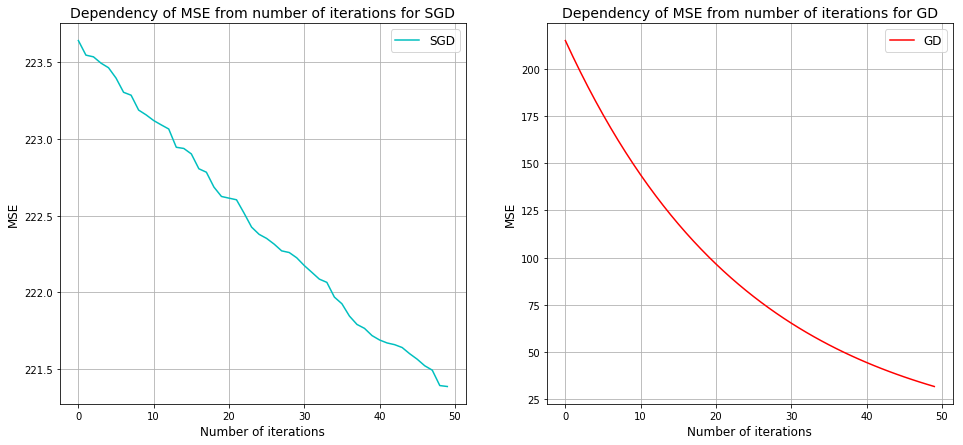

In [19]:
plt.figure(figsize = (16, 7))

plt.subplot(121)
plt.plot(range(50), stoch_errors[:50], color = 'c', label = 'SGD')
plt.title('Dependency of MSE from number of iterations for SGD', fontsize = 14)
plt.xlabel('Number of iterations', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.grid()
plt.legend(fontsize = 12)

plt.subplot(122)
plt.plot(range(50), grad_desc_errors[:50], color = 'r', label = 'GD')
plt.title('Dependency of MSE from number of iterations for GD', fontsize = 14)
plt.xlabel('Number of iterations', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.grid()
plt.legend(fontsize = 12)

plt.show()

Видно, что для стохастического градиентного спуска ошибка не обязательно уменьшается на каждой итерации, в то время как для обычного спуска ошибка монотонно убывает на каждой итерации.

Теперь посмотрим на зависимость ошибки от номера итерации для всех итераций обычного и стохастического градиентного спуска.

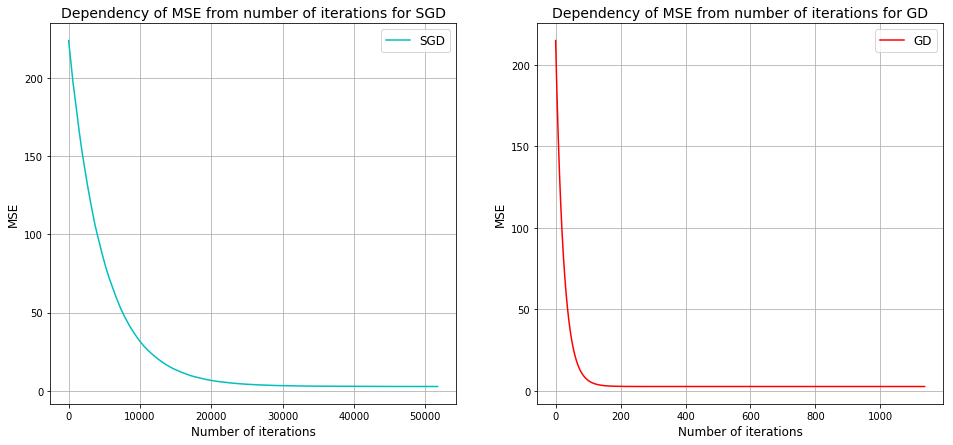

In [20]:
plt.figure(figsize = (16, 7))

plt.subplot(121)
plt.plot(range(len(stoch_errors)), stoch_errors, color = 'c', label = 'SGD')
plt.title('Dependency of MSE from number of iterations for SGD', fontsize = 14)
plt.xlabel('Number of iterations', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.grid()
plt.legend(fontsize = 12)

plt.subplot(122)
plt.plot(range(len(grad_desc_errors)), grad_desc_errors, color = 'r', label = 'GD')
plt.title('Dependency of MSE from number of iterations for GD', fontsize = 14)
plt.xlabel('Number of iterations', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.grid()
plt.legend(fontsize = 12)

plt.show()

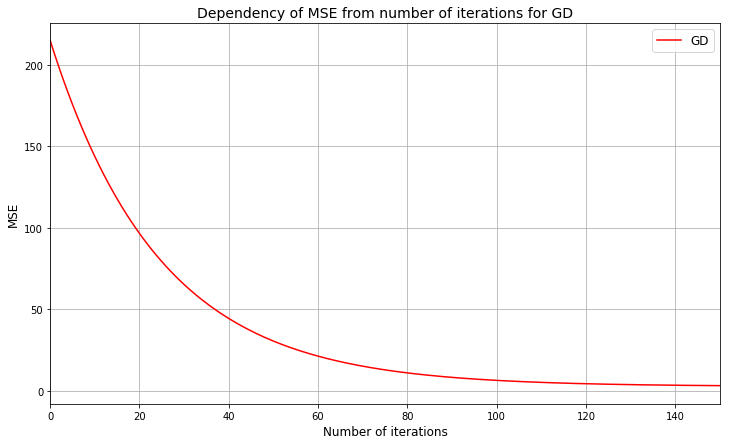

In [21]:
plt.figure(figsize = (12, 7))
plt.xlim(0, 150)
plt.plot(grad_desc_errors, color = 'r', label = 'GD')
plt.title('Dependency of MSE from number of iterations for GD', fontsize = 14)
plt.xlabel('Number of iterations', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.grid()
plt.legend(fontsize = 12)

plt.show()

<div style="text-align: justify">
Видно, что оба метода сходятся, но при этом обычный градиентный спуск сходится к решению за намного меньшее количество итераций, чем его стохастическая версия. Это связано с тем, что обычный градиентный спуск гарантировано на каждой итерации уменьшает функционал ошибки на всей выборке, что нельзя сказать про его стохастическую версию, которая минимизирует функционал ошибки на каком-то конкретном объекте выборки. 
</div>

Посмотрим на вектора весов, к которым сошлись градиентные методы.

In [24]:
np.set_printoptions(precision = 3)
print('Weights for normal gradient descent: {}'.format(stoch_grad_desc_weights))
print('Weights for stochastic gradient descent: {}'.format(grad_desc_weights))

Weights for normal gradient descent: [3.882e+00 2.744e+00 3.743e-03 1.393e+01]
Weights for stochastic gradient descent: [ 3.919  2.792 -0.023 14.022]


Сравним среднеквадратичную ошибку прогноза значений Sales в виде линейной модели с весами, найденными с помощью аналиического решения, обычного градиентного спуска и его стохастической версии.

In [23]:
print("Mean squared error for linear model with weights from analytical solution: {}".format
      (mean_squared_error(y, linear_prediction(X, analytical_weights))))

print("Mean squared error for linear model with weights from GD: {}".format
      (mean_squared_error(y, linear_prediction(X, grad_desc_weights))))

print("Mean squared error for linear model with weights from SGD: {}".format
      (mean_squared_error(y, linear_prediction(X, stoch_grad_desc_weights))))

Mean squared error for linear model with weights from analytical solution: 2.78412631451
Mean squared error for linear model with weights from GD: 2.78412631451
Mean squared error for linear model with weights from SGD: 2.79547612105


Видим, что ошибки очень близки по своему значению.

## Выводы

<div style="text-align: justify">
Можно сделать вывод, что обычная версия градиентного спуска сходится к решению за меньшее число шагов, чем его стохастическая версия, что обусловлено особенностями построения стохастического градиентного спуска. При запуске одинакового числа итераций обоих спусков, они показывали примерно одинаковое время работы. Это может объясняться тем, что наша выборка не содержала большого количество объектов и поэтому не было большой разницы во времени подсчета градиента по всей выборке и по одному случайному элементу. При больших выборках разница во времени работы должна быть более заметной. Также оба метода в конечном итоге показали схожую среднеквадратичную ошибку прогноза линейной модели с ошибкой, вычисленной при помощи весов, получаемых из точного аналитического решения.
</div>